In [82]:
#import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loding Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

In [83]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


In [84]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [85]:
df_DA_Skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_Skills = df_DA_Skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_US)
df_DA_Skills['skill_percent'] = df_DA_Skills['skill_count']/DA_job_count * 100
skill_percent = 5
df_DA_Skills_high_demand = df_DA_Skills[df_DA_Skills['skill_percent'] > skill_percent]
df_DA_Skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [86]:
!pip install adjustText

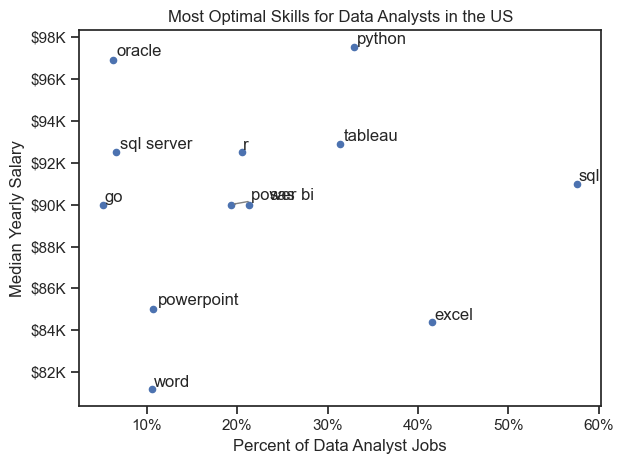

In [87]:
from adjustText import adjust_text

df_DA_Skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_Skills_high_demand.index):
    texts.append(plt.text(df_DA_Skills_high_demand['skill_percent'].iloc[i], df_DA_Skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#ax = plt.gca()
#ax.yaxis.set_major_formatter(lambda y, pos: f'{int(y/1000)}$')


plt.tight_layout()
plt.show()

In [88]:
df_technology_dict = df['job_type_skills']

In [89]:
df_technology = pd.DataFrame(list(df_technology_dict.items()), columns=['technology', 'skills']) 
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,0,None
1,1,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,2,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,3,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,4,"{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...
785736,785736,"{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,785737,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,785738,"{'analyst_tools': ['powerpoint', 'excel']}"
785739,785739,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [90]:
df_DA_Skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

,skill_count,median_salary,skill_percent,technology,skills


In [91]:
df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_skills_high_demand = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(20)

df_DA_skills_high_demand = df_DA_skills_high_demand.reset_index().rename(columns={
    'count': 'skill_count', 
    'median': 'median_salary'
})

df_technology_dict = {
    'programming': ['python', 'r', 'sql', 'scala', 'java', 'cpp', 'c#'],
    'cloud': ['aws', 'azure', 'gcp', 'oracle', 'ibm', 'snowflake', 'databricks'],
    'analyst_tools': ['tableau', 'power bi', 'excel', 'looker', 'sas', 'ssis'],
    'databases': ['mysql', 'postgresql', 'mongodb', 'cassandra', 'dynamodb', 'redshift'],
    'libraries': ['pandas', 'numpy', 'scipy', 'matplotlib', 'seaborn', 'scikit-learn']
}

df_technology = pd.DataFrame(list(df_technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')

df_plot = df_DA_skills_high_demand_merged = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot
df_plo = df_DA_skills_high_demand_merged

In [ ]:
df_plot['skill_percent'] = (df_plot['skill_count'] / df_DA_US.shape[0]) * 100

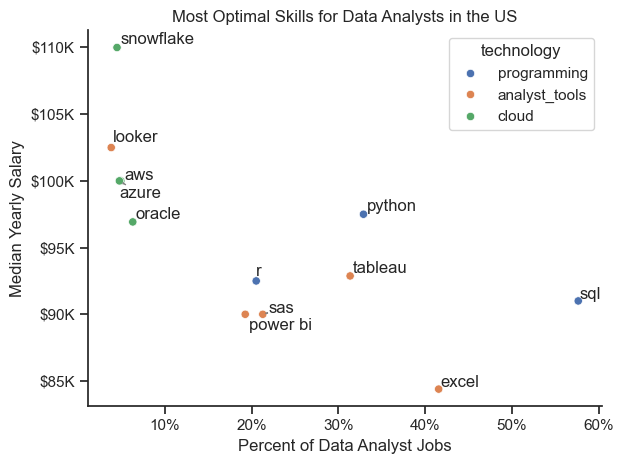

In [ ]:
from adjustText import adjust_text
import matplotlib.ipynb as plt
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')
texts = []
for i, txt in enumerate(df_plot['job_skills']):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i], df_plot['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#ax = plt.gca()
#ax.yaxis.set_major_formatter(lambda y, pos: f'{int(y/1000)}$')


plt.tight_layout()
plt.show()